In [2]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from collections import Counter
from wordcloud import WordCloud
from nltk.corpus import stopwords
import re
from sklearn.linear_model import Ridge, Lasso, LinearRegression, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from scipy.stats import zscore

## RQ1: What are the main sources of carbon emissions?

In [ ]:
# read file
carbon_df = pd.read_csv("C:\\Users\\user\\Downloads\\FYP_2025\\Carbon_dataset.csv")

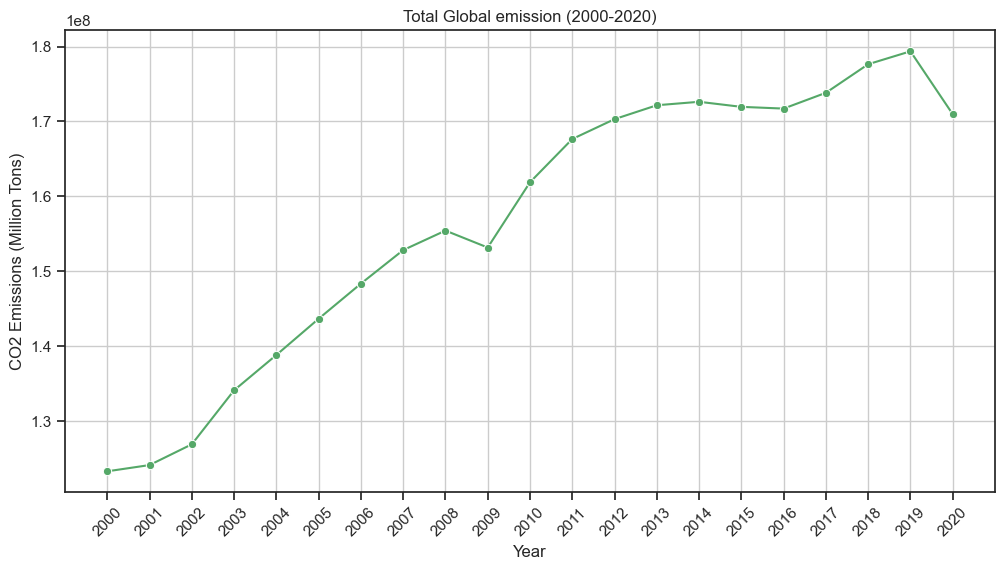

In [21]:
# total global emission
total_emission = carbon_df.groupby(['Year'])['Total Annual CO2 Emissions'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(total_emission,x='Year', y='Total Annual CO2 Emissions', marker='o', color='g')
plt.ylabel("CO2 Emissions (Million Tons)")
plt.title('Total Global emission (2000-2020)')
plt.xticks(total_emission['Year'],rotation=45)
plt.grid()
plt.show()

The chart shows that global carbon emissions have been on a steady upward trend from 2000 to 2020. Total emissions in 2000 were about 25 billion tons, and by 2019, they were approaching 34.5 billion tons.
There is a slight decline between 2018 and 2020 (especially 2020), which may be related to the slowdown in global economic activity and the suspension of transportation and industrial activities due to the COVID-19 pandemic.


<Figure size 2800x1600 with 0 Axes>

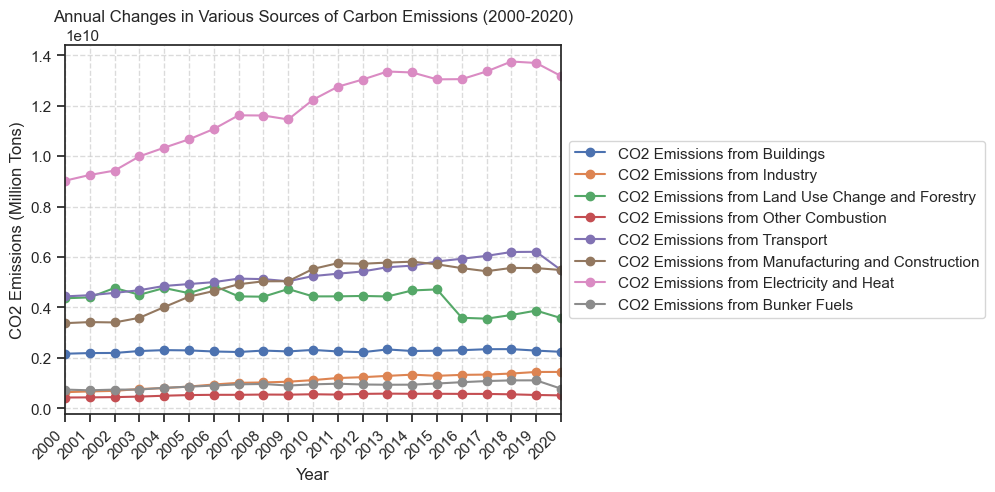

In [ ]:
# select specific columns only
emission_sources = [
    'CO2 Emissions from Buildings',
    'CO2 Emissions from Industry',
    'CO2 Emissions from Land Use Change and Forestry',
    'CO2 Emissions from Other Combustion',
    'CO2 Emissions from Transport',
    'CO2 Emissions from Manufacturing and Construction',
    'CO2 Emissions from Electricity and Heat',
    'CO2 Emissions from Bunker Fuels'
]

# group by the data
years_range = list(range(2000, 2021)) 
emission_trends = carbon_df.groupby('Year')[emission_sources].sum()

# fillna with 0
emission_trends_full = emission_trends.reindex(years_range).fillna(0)  

plt.figure(figsize=(28, 16))
emission_trends_full.plot(marker='o')

plt.xticks(
    ticks=years_range,       
    labels=years_range,      
    rotation=45,             
    ha='right'               
)

plt.title("Annual Changes in Various Sources of Carbon Emissions (2000-2020)")
plt.ylabel("CO2 Emissions (Million Tons)")
plt.xlabel("Year")
plt.xlim(2000, 2020)  
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True, linestyle='--', alpha=0.7)  
plt.show()


Electricity and heat continue to rise until 2014, then plateau and decline slightly in 2018-2020. “Sectors such as 'Transportation', 'Manufacturing and Construction', and 'Building' also show steady growth, but at a slower rate. Some emission sources, such as 'Land use change and forestry,' show a fluctuating downward trend, which may be due to forest protection policies or differences in data estimates. “Other combustion, industry, and marine fuels are smaller sources, but they are also growing. Different types of carbon sources are growing at different rates, meaning that carbon reduction strategies need to be tailored to each region.

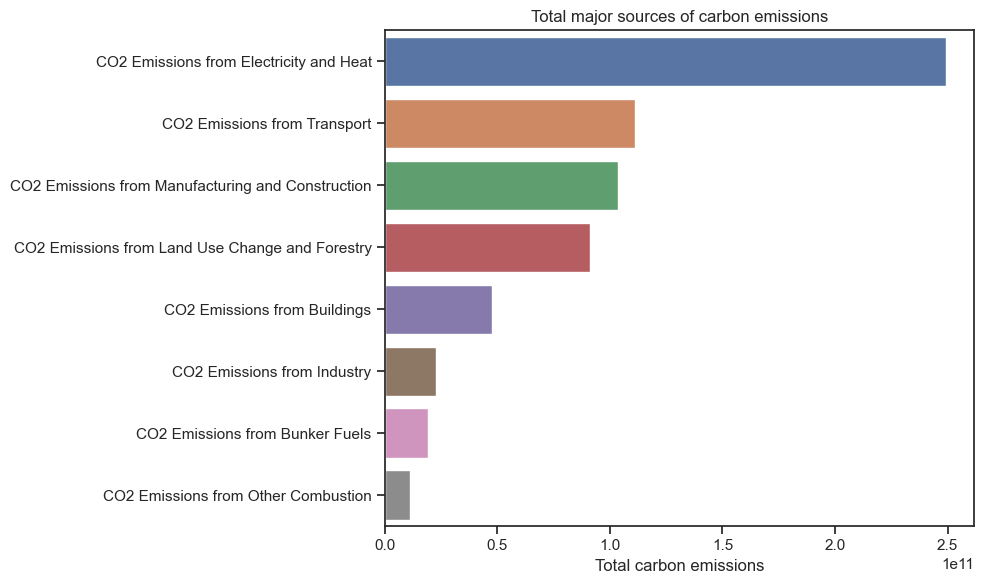

In [ ]:
# sum up the data by group
source_totals = carbon_df[emission_sources].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=source_totals.values, y=source_totals.index)
plt.title("Total major sources of carbon emissions")
plt.xlabel("Total carbon emissions")
plt.tight_layout()
plt.show()


The largest source is “electricity and heat”, with cumulative emissions of more than 2.4 x 10¹¹ tons of carbon dioxide, more than twice as much as from other sources. This is more than twice as much as the other sources, followed by “transportation” and “manufacturing and construction”, each accounting for about 15-20% of the total emissions. Although “land use change and forestry” is not a source of energy, it also accounts for a significant portion, indicating that land use change has a profound impact on the climate.

It is clear from the figure that power and heat generation are the main battlegrounds for carbon reduction. If we can increase the penetration of renewable energy and reduce the use of fossil fuels, global carbon emissions can be reduced significantly.


## RQ2: How do carbon emissions contribute to climate change?

In [ ]:
# read file
climate_df = pd.read_csv("C:\\Users\\user\\Downloads\\FYP_2025\\Climate_dataset.csv")

In [7]:
# Grouping data 
climate_focus = climate_df[['Country', 'Year', 'Avg annual temperature (Celcius)',
                            'Avg annual precipitation (mm)', 'Total Disaster recorded']]
climate_yearly = climate_focus.groupby('Year').mean().reset_index()

carbon_yearly = carbon_df.groupby('Year')['Total Annual CO2 Emissions'].sum().reset_index()

combined_df = pd.merge(carbon_yearly, climate_yearly, on='Year')

C:\Users\user\AppData\Local\Temp\ipykernel_18940\2151767637.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  climate_yearly = climate_focus.groupby('Year').mean().reset_index()


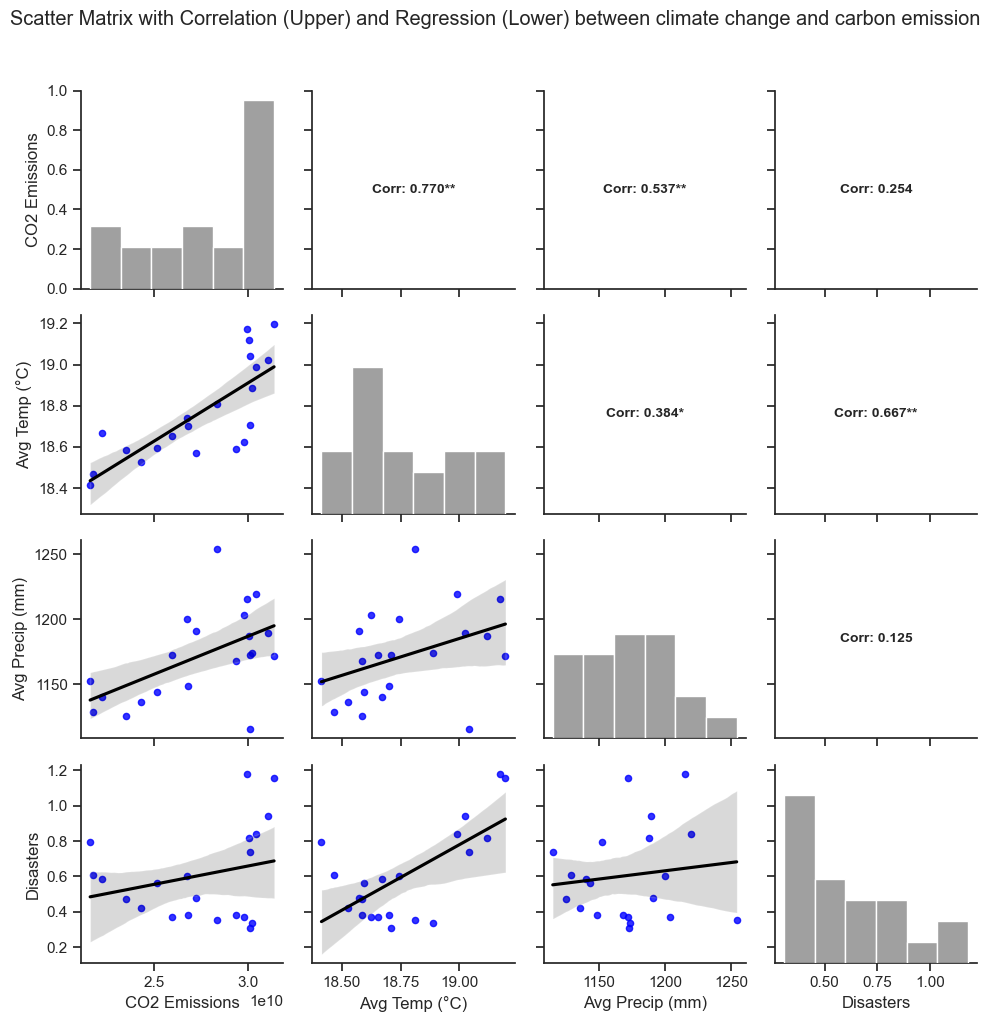

In [44]:
# Scatter plot matrix between climate change aspects and carbon emission
selected_columns = combined_df[
    ["Total Annual CO2 Emissions", 
     "Avg annual temperature (Celcius)", 
     "Avg annual precipitation (mm)", 
     "Total Disaster recorded"]
]
selected_columns.columns = [
    "CO2 Emissions",
    "Avg Temp (°C)",
    "Avg Precip (mm)",
    "Disasters"
]

# Custom correlation function (shown in upper triangle)
def corrfunc(x, y, **kws):
    r = np.corrcoef(x, y)[0, 1]
    ax = plt.gca()
    stars = ""
    if abs(r) >= 0.8:
        stars = "***"
    elif abs(r) >= 0.5:
        stars = "**"
    elif abs(r) >= 0.3:
        stars = "*"
    ax.annotate(f"Corr: {r:.3f}{stars}", xy=(0.5, 0.5), xycoords=ax.transAxes,
                ha='center', va='center', fontsize=10, fontweight='bold')

# PairGrid
sns.set(style="ticks")
g = sns.PairGrid(selected_columns)
g.map_lower(sns.regplot, scatter_kws={"color": "blue", "s": 20}, line_kws={"color": "black"})
g.map_diag(sns.histplot, kde=False, color="gray")
g.map_upper(corrfunc)

plt.suptitle("Scatter Matrix with Correlation (Upper) and Regression (Lower) between climate change and carbon emission", y=1.02)
plt.tight_layout()
plt.show()

The analysis reveals significant correlations between CO₂ emissions and climate variables. A strong positive correlation (0.770) exists between CO₂ emissions and average air temperature, indicating that higher emissions lead to increased temperatures. This finding aligns with mainstream climate change research highlighting the link between greenhouse gas emissions and global warming. Additionally, a moderate correlation (0.537) between CO₂ emissions and average precipitation suggests that greenhouse gases may influence the water cycle, affecting precipitation patterns.

Another important relationship is observed between mean temperature and the number of climate-related disasters, with a correlation coefficient of 0.667. This indicates that rising temperatures are associated with an increase in disaster events, likely reflecting more frequent extreme climate occurrences such as heat waves and heavy rainfall. In contrast, the correlation between average precipitation and disasters is weak (0.125), suggesting that precipitation changes alone do not directly correlate with disaster frequency, possibly due to regional climatic influences and complexities in defining disasters.

Overall, the data underscores the significant connections between CO₂ emissions and climate variables, particularly the relationship between rising temperatures and increased disaster occurrence, providing a solid foundation for understanding climate change impacts.

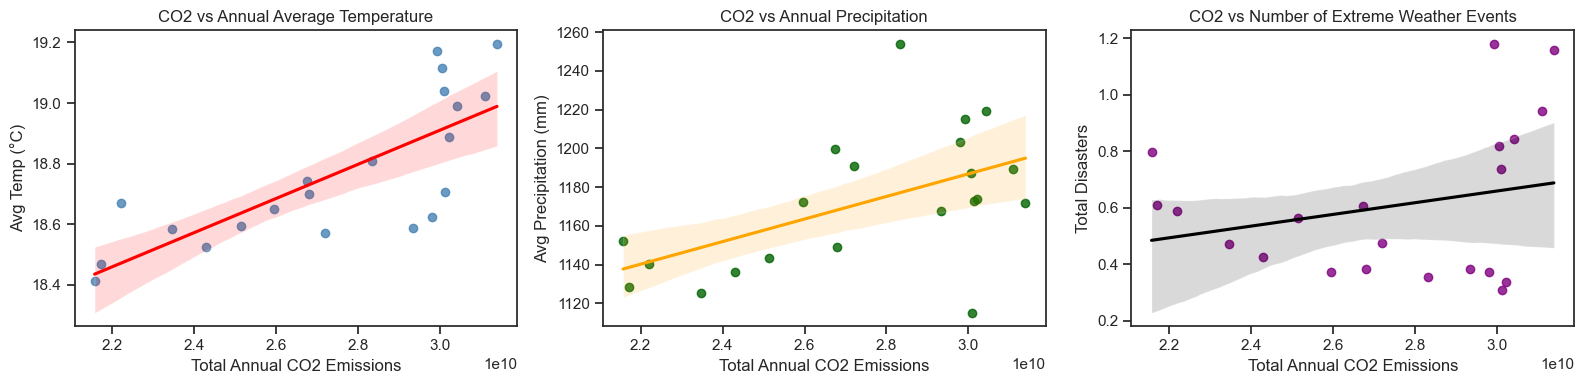

📊 Pearson correlation coefficient between carbon emissions and climate variables：
Total Annual CO2 Emissions          1.000
Avg annual temperature (Celcius)    0.770
Avg annual precipitation (mm)       0.537
Total Disaster recorded             0.254
Name: Total Annual CO2 Emissions, dtype: float64


In [ ]:
# CO2 Scatter plot 
plt.figure(figsize=(16, 4))

# CO2 vs temp
plt.subplot(1, 3, 1)
sns.regplot(data=combined_df,
            x='Total Annual CO2 Emissions',
            y='Avg annual temperature (Celcius)',
            scatter_kws={"color": "steelblue"},
            line_kws={"color": "red"})
plt.title("CO2 vs Annual Average Temperature")
plt.xlabel("Total Annual CO2 Emissions")
plt.ylabel("Avg Temp (°C)")

# CO2 vs annual
plt.subplot(1, 3, 2)
sns.regplot(data=combined_df,
            x='Total Annual CO2 Emissions',
            y='Avg annual precipitation (mm)',
            scatter_kws={"color": "darkgreen"},
            line_kws={"color": "orange"})
plt.title("CO2 vs Annual Precipitation")
plt.xlabel("Total Annual CO2 Emissions")
plt.ylabel("Avg Precipitation (mm)")

# CO2 vs disaster
plt.subplot(1, 3, 3)
sns.regplot(data=combined_df,
            x='Total Annual CO2 Emissions',
            y='Total Disaster recorded',
            scatter_kws={"color": "purple"},
            line_kws={"color": "black"})
plt.title("CO2 vs Number of Extreme Weather Events")
plt.xlabel("Total Annual CO2 Emissions")
plt.ylabel("Total Disasters")

plt.tight_layout()
plt.show()

# ========== Display Pearson correlation coefficient==========
correlations = combined_df[['Total Annual CO2 Emissions',
                            'Avg annual temperature (Celcius)',
                            'Avg annual precipitation (mm)',
                            'Total Disaster recorded']].corr()

print("📊 Pearson correlation coefficient between carbon emissions and climate variables：")
print(correlations['Total Annual CO2 Emissions'].round(3))


The correlation coefficient between carbon emission and annual mean temperature was r=0.77, p<0.001, R²=0.593, indicating that the increase in carbon emission can highly explain the change in temperature.

The correlation coefficient between mean annual rainfall and mean annual temperature was 0.537, p-value=0.0120, indicating a moderate positive correlation between them. This may imply that as the rainfall increases, the mean annual temperature also increases.

The correlation between the total number of disaster records and the other variables is lower, with a correlation coefficient of only 0.254. P-value = 0.2665, which indicates that the number of disaster records is not very closely related to these variables, and the relationship is relatively weak.

This is consistent with the core assumption of climate change that greenhouse gas emissions (e.g., carbon dioxide) are the main driver of global warming. Such statistics support the urgent call for carbon reduction in international climate policy.

This may mean that in some regions, warmer temperatures may increase the strength of the water cycle, leading to more rainfall; or conversely, years of higher rainfall may be accompanied by higher temperatures (e.g. tropical regions). However, as the correlation is not particularly high, this means that there are other variables to consider, such as atmospheric circulation and oceanic changes.

“The 'total number of disaster records' is affected by more complex factors, for example: Changes in recording techniques and standards (which have been poorly documented or not categorized in the past). Disasters are highly recurrent and regional in nature, and it is difficult to show a linear relationship with global average annual climate variability. Exposure and vulnerability of human societies (e.g., urbanization) may have a greater impact on disaster records than climate factors.


# RQ3: How do societal factors affect carbon emissions?

In [2]:
# remove outlier using z-score function
def remove_outlier_z(df):
    outlier_threshold = 3.0
    mask = np.ones(df.shape[0], dtype=bool)  
    
    for col in df.columns:
        z_scores = zscore(df[col])
        outliers_mask = np.abs(z_scores) > outlier_threshold
        mask &= ~outliers_mask 

    return df[mask]  

In [3]:
# read file
RQ4_df = pd.read_csv("C:\\Users\\user\\Downloads\\FYP_2025\\RQ_4.csv")
RQ4_df = RQ4_df.iloc[:,1:]
RQ4_df

,Year,CO2_Emissions,GDP,Population,Life_Expectancy,Unemployment_Rate,Energy_Consumption
0,2000,1047127.94,6.206548e+09,20130334,55.0047,7.955,5.913606
1,2001,1069098.00,5.621148e+09,20284303,55.5113,7.958,4.664077
2,2002,1340995.00,7.228796e+09,21378123,56.2251,7.939,4.428160
3,2003,1559602.00,7.867264e+09,22733054,57.1713,7.922,5.207662
4,2004,1237247.00,7.978516e+09,23560656,57.8098,7.914,4.810372
...,...,...,...,...,...,...,...
3387,2016,10581085.00,2.014298e+10,14600297,59.7601,5.893,46.648710
3388,2017,9826723.00,2.096487e+10,14812484,60.2626,6.347,45.256546
3389,2018,11205393.00,2.201518e+10,15034457,60.9055,6.792,51.809430
3390,2019,10262950.00,2.062108e+10,15271377,61.0603,7.373,46.119940


In [4]:
# data rescaling
RQ4_df['GDP'] = RQ4_df['GDP'] / 100000000
RQ4_df['Population'] = RQ4_df['Population'] / 1000000
RQ4_df['CO2_Emissions'] = RQ4_df['CO2_Emissions'] / 100000

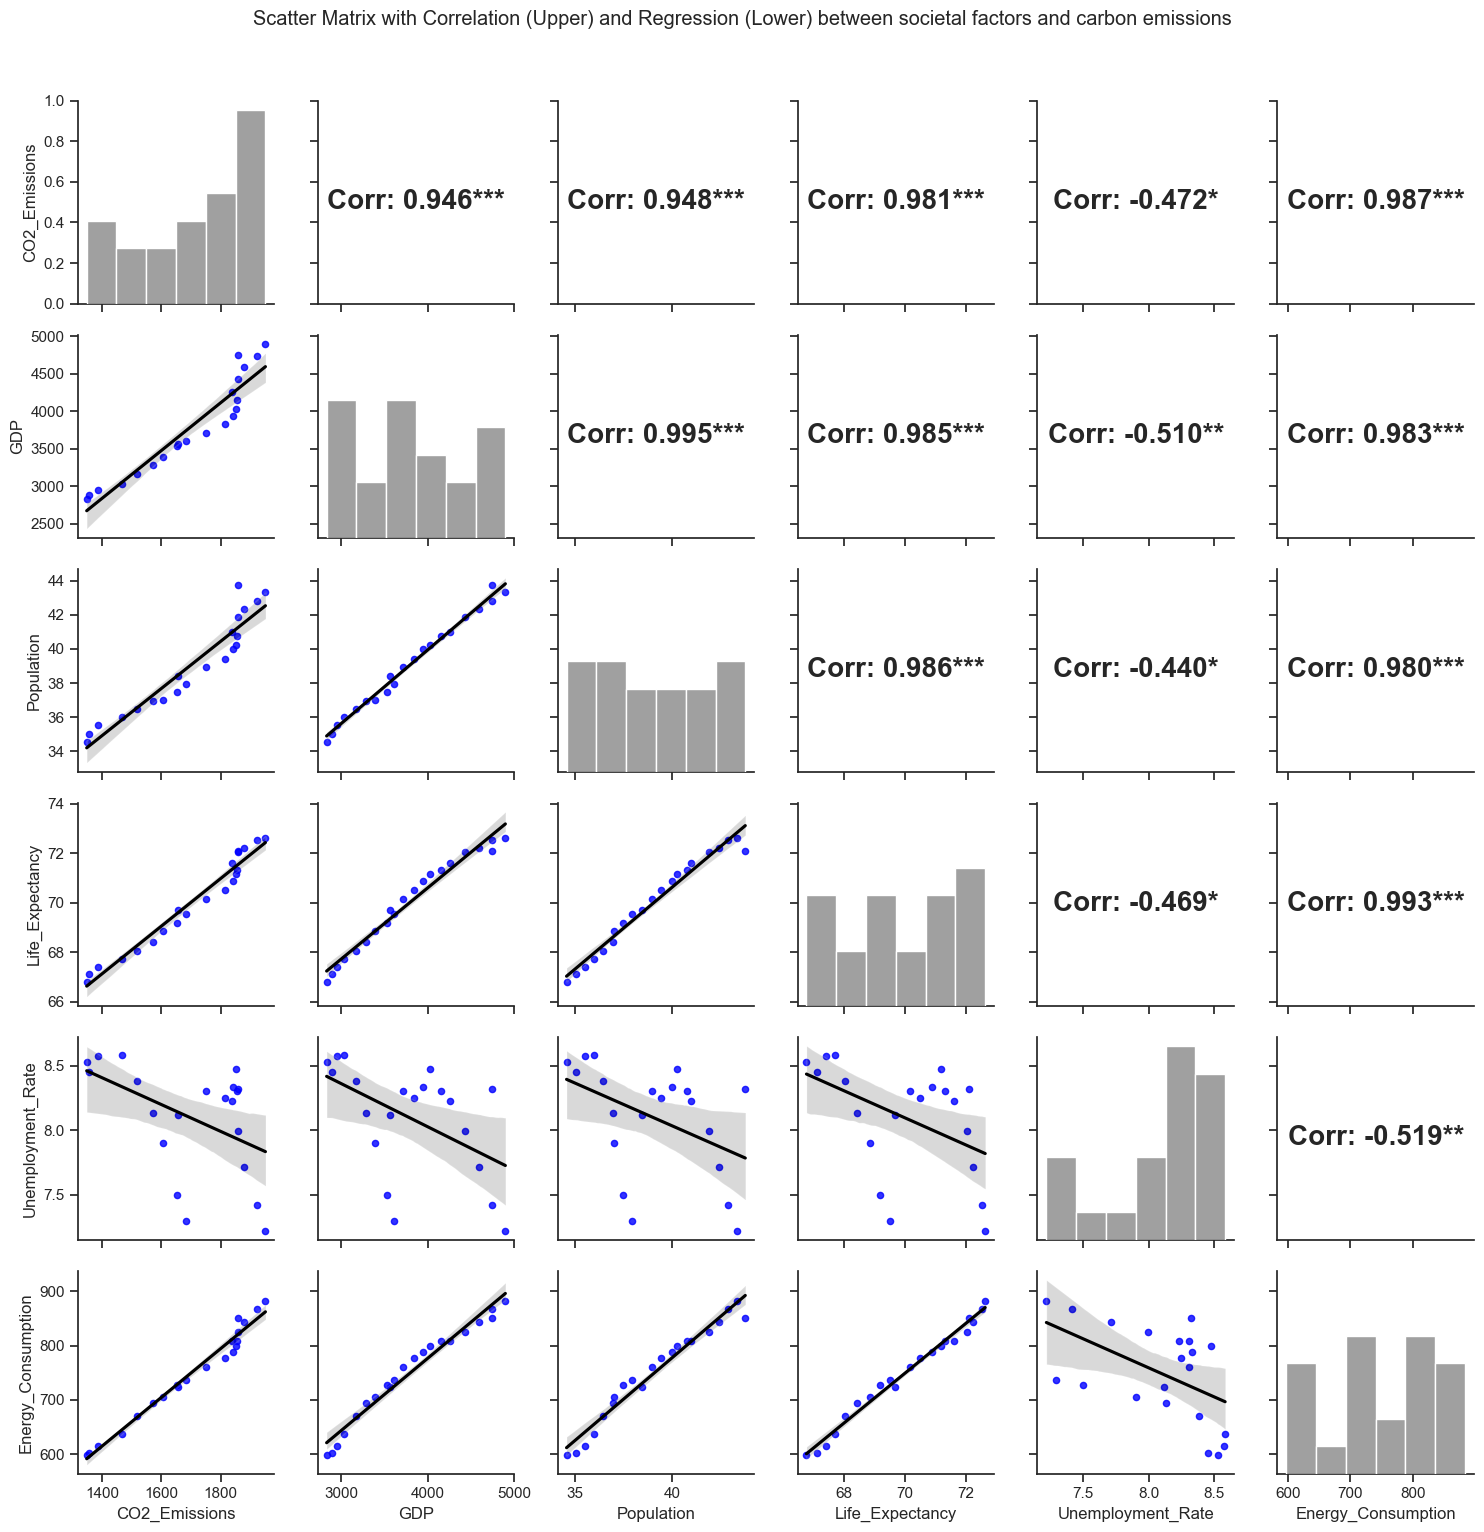

In [ ]:
# Using scatter matrix to display correlations

scatter_df = RQ4_df.groupby(['Year']).mean()
scatter_df

# Custom correlation function (shown in upper triangle)
def corrfunc(x, y, **kws):
    r = np.corrcoef(x, y)[0, 1]
    ax = plt.gca()
    stars = ""
    if abs(r) >= 0.8:
        stars = "***"
    elif abs(r) >= 0.5:
        stars = "**"
    elif abs(r) >= 0.3:
        stars = "*"
    ax.annotate(f"Corr: {r:.3f}{stars}", xy=(0.5, 0.5), xycoords=ax.transAxes,
                ha='center', va='center', fontsize=20, fontweight='bold')

# PairGrid
sns.set(style="ticks")
g = sns.PairGrid(scatter_df)
g.map_lower(sns.regplot, scatter_kws={"color": "blue", "s": 20}, line_kws={"color": "black"})
g.map_diag(sns.histplot, kde=False, color="gray")
g.map_upper(corrfunc)

plt.suptitle("Scatter Matrix with Correlation (Upper) and Regression (Lower) between societal factors and carbon emissions", y=1.02)
plt.tight_layout()
plt.show()

To analyze the impact of societal factors on carbon emissions, the data were first grouped by year, then calculated using the mean value to provide a comprehensive representation of the societal factors, and the correlation analysis revealed that all factors except the unemployment rate influenced carbon emissions. All of their correlation coefficients were revealed to be higher than 0.94, indicating a very strong association between these societal factors and carbon emissions. Moreover, the societal factors also showed a strong link with each other, showcasing that they somewhat play a role in each other. However, the unemployment rate had a very weak correlation with only a -0.47 coefficient, which is the lowest among all the factors, indicating this factor may not contribute to emitting carbon emissions. 

In [5]:
# feature selection
regress = RQ4_df.iloc[:,1:]
regress

,CO2_Emissions,GDP,Population,Life_Expectancy,Unemployment_Rate,Energy_Consumption
0,10.471279,62.065475,20.130334,55.0047,7.955,5.913606
1,10.690980,56.211476,20.284303,55.5113,7.958,4.664077
2,13.409950,72.287960,21.378123,56.2251,7.939,4.428160
3,15.596020,78.672635,22.733054,57.1713,7.922,5.207662
4,12.372470,79.785155,23.560656,57.8098,7.914,4.810372
...,...,...,...,...,...,...
3387,105.810850,201.429800,14.600297,59.7601,5.893,46.648710
3388,98.267230,209.648660,14.812484,60.2626,6.347,45.256546
3389,112.053930,220.151790,15.034457,60.9055,6.792,51.809430
3390,102.629500,206.210790,15.271377,61.0603,7.373,46.119940


In [6]:
# log transformation
log_regress = np.log(regress)

In [7]:
# remove outlier
log_regress = remove_outlier_z(log_regress)
log_regress

,CO2_Emissions,GDP,Population,Life_Expectancy,Unemployment_Rate,Energy_Consumption
0,2.348636,4.128190,3.002228,4.007419,2.073801,1.777256
1,2.369400,4.029121,3.009847,4.016587,2.074178,1.539890
2,2.595997,4.280658,3.062368,4.029363,2.071787,1.487984
3,2.747016,4.365295,3.123820,4.046052,2.069644,1.650131
4,2.515474,4.379337,3.159578,4.057158,2.068633,1.570774
...,...,...,...,...,...,...
3387,4.661653,5.305441,2.681042,4.090338,1.773765,3.842645
3388,4.587691,5.345433,2.695470,4.098712,1.847982,3.812347
3389,4.718980,5.394317,2.710345,4.109323,1.915745,3.947572
3390,4.631125,5.328899,2.725980,4.111862,1.997825,3.831245


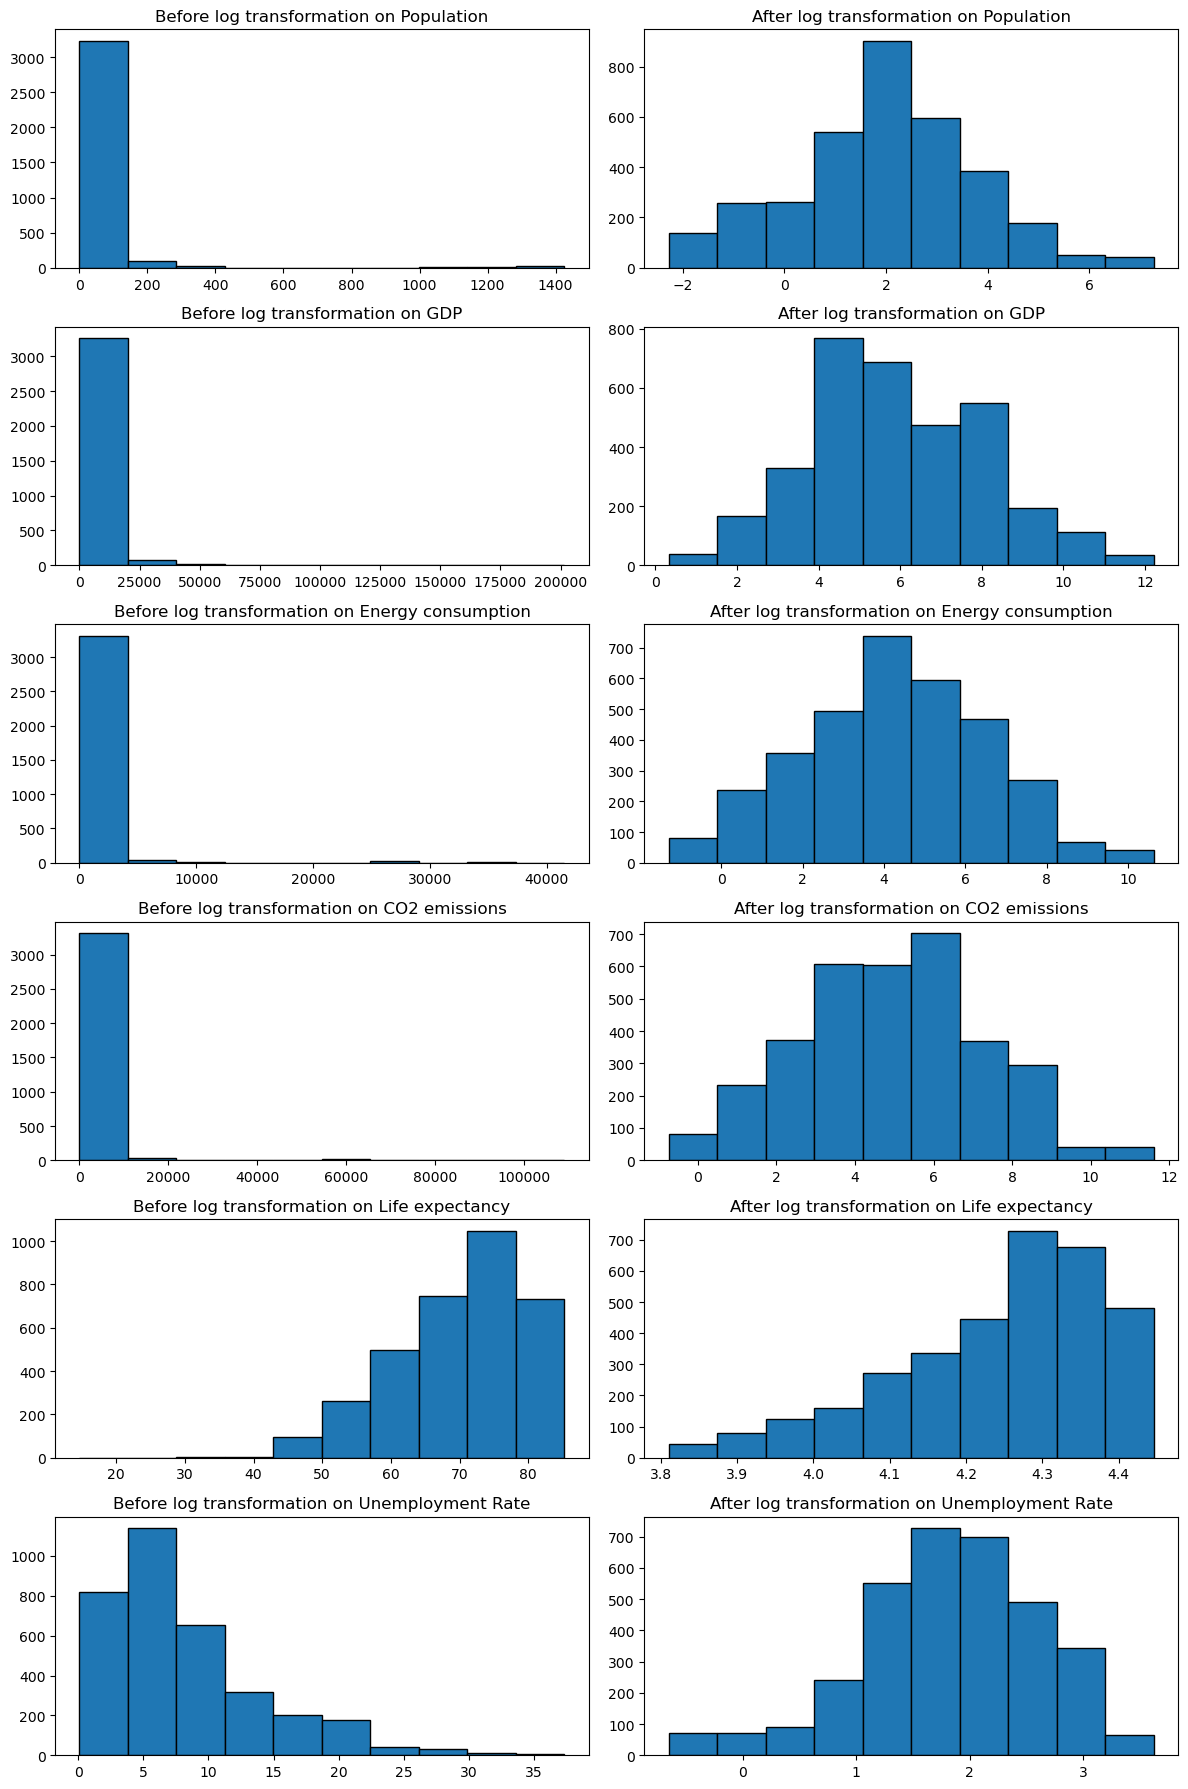

In [8]:
# plot histogram on the distribution of the before and after the data are log transformationed 
fig, axs = plt.subplots(nrows=6, ncols=2, figsize=(12, 18))

# Population histograms
axs[0, 0].hist(regress['Population'], edgecolor='black')
axs[0, 0].set_title('Before log transformation on Population')

axs[0, 1].hist(log_regress['Population'], edgecolor='black')
axs[0, 1].set_title('After log transformation on Population')

# GDP histograms
axs[1, 0].hist(regress['GDP'], edgecolor='black')
axs[1, 0].set_title('Before log transformation on GDP')

axs[1, 1].hist(log_regress['GDP'], edgecolor='black')
axs[1, 1].set_title('After log transformation on GDP')

# Renewable energy share histograms
axs[2, 0].hist(regress['Energy_Consumption'], edgecolor='black')
axs[2, 0].set_title('Before log transformation on Energy consumption')

axs[2, 1].hist(log_regress['Energy_Consumption'], edgecolor='black')
axs[2, 1].set_title('After log transformation on Energy consumption')

# CO2 emissions histograms
axs[3, 0].hist(regress['CO2_Emissions'], edgecolor='black')
axs[3, 0].set_title('Before log transformation on CO2 emissions')

axs[3, 1].hist(log_regress['CO2_Emissions'], edgecolor='black')
axs[3, 1].set_title('After log transformation on CO2 emissions')

# Life expectancy histograms
axs[4, 0].hist(regress['Life_Expectancy'], edgecolor='black')
axs[4, 0].set_title('Before log transformation on Life expectancy')

axs[4, 1].hist(log_regress['Life_Expectancy'], edgecolor='black')
axs[4, 1].set_title('After log transformation on Life expectancy')

# Unemployment rate
axs[5, 0].hist(regress['Unemployment_Rate'], edgecolor='black')
axs[5, 0].set_title('Before log transformation on Unemployment Rate')

axs[5, 1].hist(log_regress['Unemployment_Rate'], edgecolor='black')
axs[5, 1].set_title('After log transformation on Unemployment Rate')

plt.tight_layout()
plt.show()

After the data preprocessing, a log transformation was applied to normalize the data distribution. This technique is particularly useful when dealing with skewed data, which is common in many datasets, especially those involving economic or environmental variables like CO₂ emissions and temperature.

The log transformation helps to reduce the impact of outliers and compresses the range of values, making the data more symmetric. By applying the logarithm, values that are significantly higher than the others are scaled down, which can enhance the performance of statistical analyses and machine learning models that assume normally distributed data.

## Model training and testing

In [15]:
# Train and test split
Y = log_regress['CO2_Emissions']
X = log_regress.drop('CO2_Emissions',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [16]:
# Model comparsion and training
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1),
    'Lasso Regression': Lasso(alpha=1, max_iter=1000),
    'Elastic Net Regression': ElasticNet(alpha=1.0, l1_ratio=0.7)
}

model_result = []
model_predictions = {}
model_use = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
        
    model_result.append({
        'Model': model_name,
        'Mean Square Error': mean_squared_error(y_test, y_pred),
        'Root Mean Square Error': np.sqrt(mean_squared_error(y_test,y_pred)),
        'Mean Absolute Error': mean_absolute_error(y_test,y_pred),
        'R Squared': r2_score(y_test, y_pred)
        
    })
    
    model_use.append(model)
    
    model_predictions[model_name] = y_pred


In [17]:
# show the result in dataframe
model_result_df = pd.DataFrame(model_result)
model_result_df['R Squared'] = model_result_df['R Squared'].transform(lambda x: '{:,.3}'.format(x))
model_result_df

,Model,Mean Square Error,Root Mean Square Error,Mean Absolute Error,R Squared
0,Linear Regression,0.143154,0.378357,0.281119,0.972
1,Ridge Regression,0.143215,0.378438,0.281191,0.972
2,Lasso Regression,0.338890,0.582142,0.470506,0.933
3,Elastic Net Regression,0.306706,0.553811,0.451891,0.939


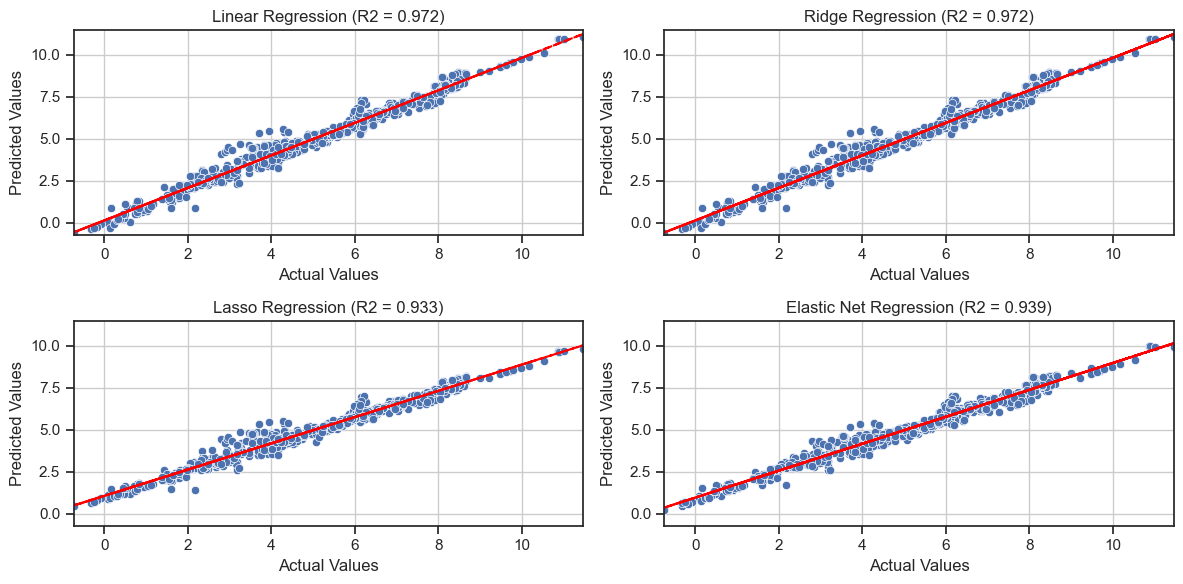

In [ ]:
# plot predicted vs test values
fig, axs = plt.subplots(2, 2, figsize=(12, 6))
axs = axs.flatten()  

for ax, (model_name, y_pred) in zip(axs, model_predictions.items()):
    sns.scatterplot(x=y_test, y=y_pred, ax=ax)
    
    min_val = min(y_test.min(), y_pred.min())
    max_val = max(y_test.max(), y_pred.max())
    
    # fitting a linear regression line
    m, b = np.polyfit(y_test, y_pred, 1)
    # adding the regression line to the scatter plot
    ax.plot(X_test, m*X_test + b, color='red', linestyle='--')
    
    r_squared = model_result_df.loc[model_result_df['Model'] == model_name, 'R Squared'].values[0]
    ax.set_title(f'{model_name} (R2 = {r_squared})')
    ax.set_xlabel('Actual Values')
    ax.set_ylabel('Predicted Values')
    ax.set_xlim(min_val, max_val)
    ax.set_ylim(min_val, max_val)
    ax.grid()

plt.tight_layout()
plt.show()

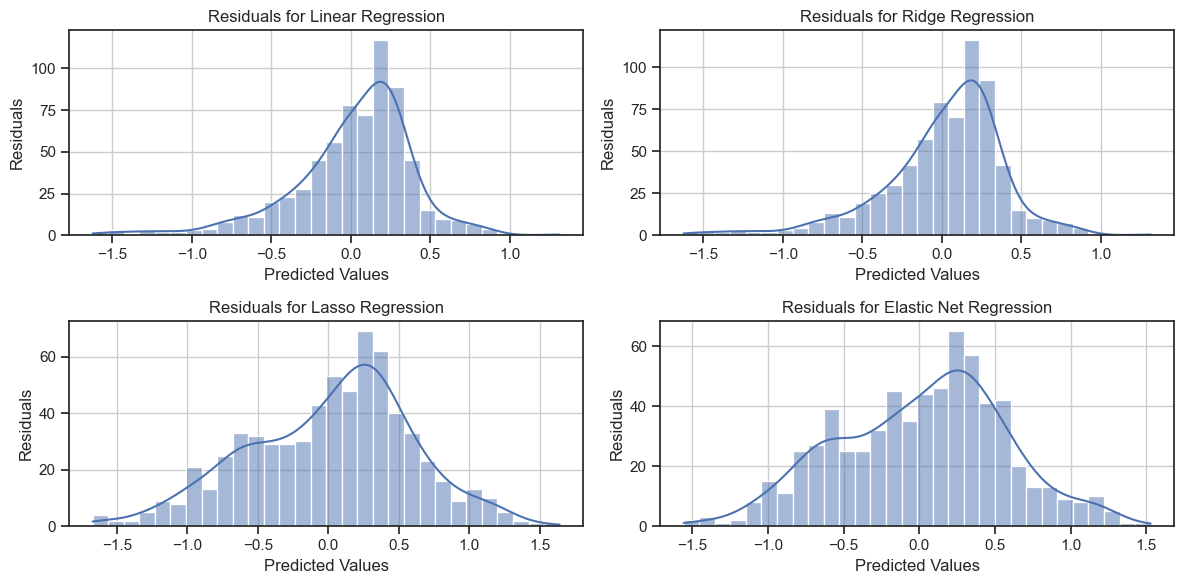

In [84]:
# plot residuals
fig, axs = plt.subplots(2, 2, figsize=(12, 6))
axs = axs.flatten()  

# Loop through models and axes
for ax, (model_name, y_pred) in zip(axs, model_predictions.items()):
    residuals = y_test - y_pred
    
    sns.histplot(residuals, ax=ax, bins=30, kde=True)
    
    ax.set_title(f'Residuals for {model_name}')
    ax.set_xlabel('Predicted Values')
    ax.set_ylabel('Residuals')
    ax.grid()

plt.tight_layout()
plt.show()

The 4 regression models were used to evaluate the relationship between the independent (societal factors) and dependent (carbon emission) variables, and the performance for each regression model revealed a good performance in R2, where all the values were above 0.9, indicating all these models were able to explain 90% of the variance in carbon emissions. It also showed an interesting result within the 4 models, which are divided into 2 groups based on the similarity of the metric values, as they are similar to each other. The metrics with the better performance in terms of error metrics were the Linear and Ridge models, achieving low values compared to the second group (Lasso, Elastic Net). The MSE, RMSE, and MAE were all lower than 0.4 values, which showed that these models' accuracy was much better compared to the second group, where their lowest error metric values are 0.3, suggesting this two models — Lasso and Elastic Net is weak in predicting the carbon emissions despite attaining a high R2 value. Thus, comparing Linear and Ridge, they both performed very well, which contributed to valuable insight, but the Linear model outperformed the Ridge model, making it the most effective model in predicting carbon emissions.

In [21]:
# Cross validation for the chosen model
best_model = model_use[0]

k = 5 
kf = KFold(n_splits=k, shuffle=True, random_state=42)

scores = cross_val_score(best_model, X, Y, cv=kf, scoring='r2')
average_r2 = np.mean(scores) 

print(f"R² Score for each fold: {[float(round(score, 4)) for score in scores]}")
print(f"Average R² across {k} folds: {average_r2:.2f}")

R² Score for each fold: [0.9715, 0.9729, 0.9641, 0.9682, 0.9758]
Average R² across 5 folds: 0.97


All validation set showed a high vaidation scores with a average score being over 90% indicating the chances of the best performing model being overfitting and underfitting is low

In [22]:
# display coefficients variables
coefficients_df = pd.DataFrame()

coefficients_df['Features'] = regress.columns[1:]

coefficients_df['Coefficients values'] = best_model.coef_

coefficients_df

,Features,Coefficients values
0,GDP,0.117773
1,Population,0.027918
2,Life_Expectancy,-0.579100
3,Unemployment_Rate,0.074749
4,Energy_Consumption,0.894688


Model interpretation:  

As the model was trained on log transformation, using the formula, Percentage Change = +/-(coefficient × 100), is used to check the interpretations of the model are as follows:

GDP: A one-unit increase in GDP is associated with approximately a 11.8% increase in CO2 emissions  

Population: A one-person increase in population is associated with approximately a 0.2% increase in CO2 emissions  

Life Expectancy: A one-year increase in life expectancy is associated with approximately a 57.9% decrease in CO2 emissions 

Unemployment Rate: A one-percentage point increase in the unemployment rate is associated with approximately a 0.7% increase in CO2 emissions  

Energy Consumption: A one-unit increase in energy consumption is associated with approximately a 89.5% increase in CO2 emissions

## Senario Development

In [23]:
year_df = RQ4_df.groupby(['Year']).mean().reset_index()
year_df

,Year,CO2_Emissions,GDP,Population,Life_Expectancy,Unemployment_Rate,Energy_Consumption
0,2000,1347.862935,2828.602898,34.571288,66.776183,8.527350,597.850260
1,2001,1356.542844,2885.336784,35.046450,67.113039,8.452450,602.389866
2,2002,1386.777886,2945.389186,35.519741,67.416112,8.578669,614.973785
3,2003,1465.651692,3032.214751,35.991092,67.722659,8.585081,637.810542
4,2004,1516.859813,3163.284481,36.462922,68.053520,8.386456,670.633663
5,2005,1570.471707,3287.260952,36.936805,68.417874,8.133337,694.903151
6,2006,1604.932817,3390.080977,36.999155,68.842008,7.903457,705.041049
7,2007,1653.393782,3533.002032,37.470667,69.179490,7.496611,727.188554
8,2008,1681.458337,3603.457166,37.952549,69.518186,7.292920,736.111358
9,2009,1657.002454,3558.356929,38.444262,69.683565,8.119660,724.391703


In [24]:
senario_case = {
    'best': {'GDP':10,'Population':10,'Life':10,'Unemployment':-10,'Energy':-10},
    'base': {'GDP':5,'Population':5,'Life':5,'Unemployment':5,'Energy':5},
    'worst': {'GDP':-10,'Population':-10,'Life':-10,'Unemployment':10,'Energy':10}
}

senario_values = {}

In [25]:
# Assuming value_2020_df is defined and contains your data
value2020 = list(year_df[year_df['Year'] == 2020].iloc[:,2:].iloc[0])

scenario = {
    'best': {'GDP': -10, 'Population': -10, 'Unemployment_Rate': -10, 'Life_Expectancy': -10, 'Energy_Consumption': -10},
    'base': {'GDP': 10, 'Population': 10, 'Unemployment_Rate': -10, 'Life_Expectancy': 10, 'Energy_Consumption': -10},
    'worst': {'GDP': 10, 'Population': 10, 'Unemployment_Rate': 10, 'Life_Expectancy': 10, 'Energy_Consumption': 10}    
}

scenario_values = {}

for case in scenario:
    new_values = []
    current_value = value2020
    
    for sample_num in range(10):
        
        calculated_percent_change = []
        
        for variable, percent_change in scenario[case].items():
            if percent_change > 0:
                num_change = (1 + (percent_change / 100))
            else:
                num_change = (1 - (abs(percent_change) / 100))
                
            calculated_percent_change.append(num_change)
        
        sample_values = []
        for index_percent_value in range(len(calculated_percent_change)):
            new_calculated_value = current_value[index_percent_value] * calculated_percent_change[index_percent_value]
            sample_values.append(new_calculated_value)
        
        new_values.append(sample_values)
        current_value = sample_values
        
    scenario_values[case] = new_values 

In [26]:
CO2_emission = list(year_df['CO2_Emissions'])

CO2_values = {
    'best': [],
    'base': [],
    'worst': []
}

CO2_values['best'] = CO2_emission.copy()
CO2_values['base'] = CO2_emission.copy()
CO2_values['worst'] = CO2_emission.copy()

for case in scenario_values:
    for values in scenario_values[case]:
        data = np.array(values).reshape(1, -1)
        y_pred = best_model.predict(data)[0]
        CO2_values[case].append(y_pred)

# Check the length of each case
len_best = len(CO2_values['best'])
len_base = len(CO2_values['base'])
len_worst = len(CO2_values['worst'])

print(len_best, len_base, len_worst)

# Optionally print the CO2 values for verification
print(CO2_values)

31 31 31
{'best': [1347.8629353168749, 1356.542844211875, 1386.77788559375, 1465.6516921862499, 1516.8598128162498, 1570.471706685, 1604.9328170006172, 1653.3937821296297, 1681.458336541358, 1657.0024535265431, 1751.0442248123456, 1813.6365401506173, 1842.3130977839508, 1851.0529692846624, 1856.101732349693, 1837.7054552457316, 1857.5451193802467, 1880.2872264833331, 1921.4508857098763, 1951.3517543223602, 1859.5681696931676, 1154.8136598665496, 1039.5984209814042, 935.9047059847732, 842.5803624878052, 758.5884533405341, 682.9957351079901, 614.9622886987005, 553.7321869303399, 498.62509533881524, 449.02871290644316], 'base': [1347.8629353168749, 1356.542844211875, 1386.77788559375, 1465.6516921862499, 1516.8598128162498, 1570.471706685, 1604.9328170006172, 1653.3937821296297, 1681.458336541358, 1657.0024535265431, 1751.0442248123456, 1813.6365401506173, 1842.3130977839508, 1851.0529692846624, 1856.101732349693, 1837.7054552457316, 1857.5451193802467, 1880.2872264833331, 1921.4508857098

c:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have val

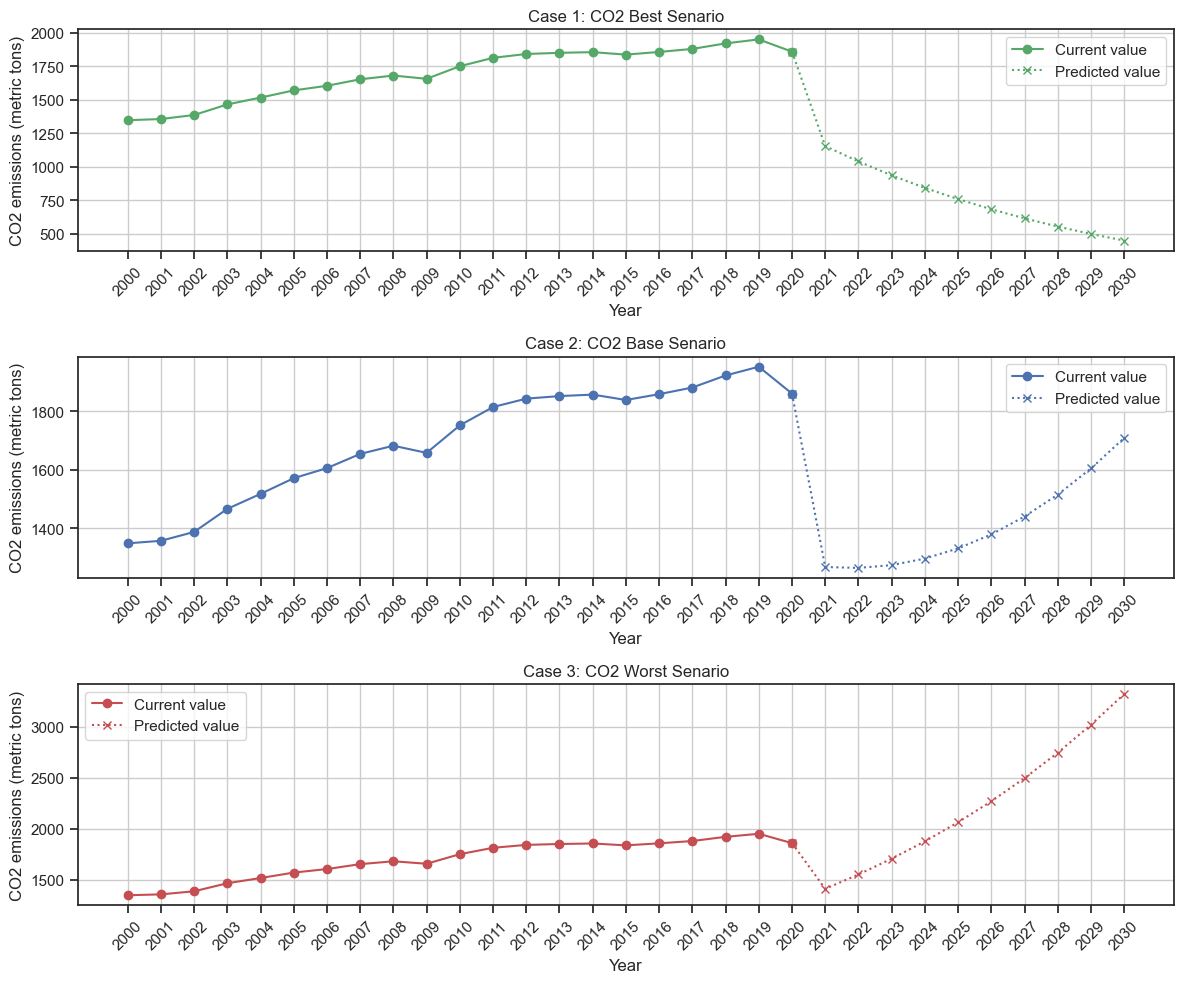

In [43]:
# plot the predictions based on the 3 senarios
Year = [i for i in range(2000,2031)]

fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(12, 10))

axs[0].plot(Year[:21], CO2_values['best'][:21], marker='o', color='g', label='Current value')
axs[0].plot(Year[20:], CO2_values['best'][20:], marker='x', color='g', label='Predicted value',linestyle =':')
axs[0].set_title('Case 1: CO2 Best Senario')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('CO2 emissions (metric tons)')
axs[0].grid()
axs[0].legend()
axs[0].set_xticks(Year)
axs[0].tick_params(axis='x',rotation=45)

axs[1].plot(Year[:21], CO2_values['base'][:21], marker='o', color='b', label='Current value')
axs[1].plot(Year[20:], CO2_values['base'][20:], marker='x', color='b', label='Predicted value',linestyle =':')
axs[1].set_title('Case 2: CO2 Base Senario')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('CO2 emissions (metric tons)')
axs[1].grid()
axs[1].legend()
axs[1].set_xticks(Year)
axs[1].tick_params(axis='x',rotation=45)

axs[2].plot(Year[:21], CO2_values['worst'][:21], marker='o', color='r', label='Current value')
axs[2].plot(Year[20:], CO2_values['worst'][20:], marker='x', color='r', label='Predicted value',linestyle =':')
axs[2].set_title('Case 3: CO2 Worst Senario')
axs[2].set_xlabel('Year')
axs[2].set_ylabel('CO2 emissions (metric tons)')
axs[2].grid()
axs[2].legend()
axs[2].set_xticks(Year)
axs[2].tick_params(axis='x',rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

As the data is being predicted from 2020 onwards, we see a similar drop in all senarios. This could be due to the assumption on the effect of covid where majority of carbon emissions contributers were on hold due to the pandemic. But as the situation got better, case 3 had a sigificant increase in carbon emission due to the assumption of the worst case where all features: GDP, Population, Unemployment_Rate, Life_Expectancy, Energy_Consumption; had an increase of 10% every year. Whereas case 1 having the best result with carbon emission was reducing towards the year 2030 which is expected to further decrease steadily as it had an decrease of 10% on all features. Moreover, Case 2 being the most neutral where features were carefully selected to promote econimic growth while also considering the enviromental sustainability where renewable is adpoted but still show a increase at the end of 2030 showcasing the other variable still contribute to the increased of carbon emission as shown from the result from case 1 and 3. 


# RQ4: What can be done to reduce carbon emissions and minimize climate impacts?

In [ ]:
# read file
RQ3_df = pd.read_csv('C:\\Users\\user\\Downloads\\FYP_2025\\RQ_3.csv')
RQ3_df

,Year,Policy_title,Country_iso,Country,Sector,Policy_description,Policy_objective,Iso_code
0,2008,"""All inclusive"" Feed-in Tariff for small renew...",ITA,Italy,"Electricity and heat, Renewables",The Decree of 11 April 2008 lays down the crit...,Mitigation,IT
1,2011,"""Energy of the Future"" monitoring process",DEU,Germany,General,At the heart of the monitoring process for the...,Mitigation,DE
2,2004,"""Energy-efficient Systems in Trade and Industr...",DEU,Germany,"Industry, Buildings, Appliances",Unknown,Mitigation,DE
3,2014,"""Investment for the Future"" Programme",FRA,France,"Transport, Low-emissions mobility","As part of the ""Investment for the Future” pro...",Mitigation,FR
4,2005,"""Kids ISO 14000 Program"" for Energy Conservati...",KOR,South Korea,"Electricity and heat, Buildings, Hot water and...",Unknown,Mitigation,KR
...,...,...,...,...,...,...,...,...
4988,2017,Clean Growth Strategy,GBR,United Kingdom,General,This strategy sets out proposals for decarboni...,"Mitigation, Adaptation",GB
4989,2017,Industrial Decarbonisation and Energy Efficien...,GBR,United Kingdom,General,These action plans establish voluntary commitm...,"Mitigation, Adaptation",GB
4990,2011,Better Buildings Challenge,USA,United States,"Buildings, Electricity and heat",This program by the U.S. Department of Energy ...,Mitigation,US
4991,2003,Healthy Forest Restoration Act of 2003 (Public...,USA,United States,Agriculture and forestry,This Act aims to improve the capacity of the S...,"Mitigation, Land use",US


## Number of policies over the years

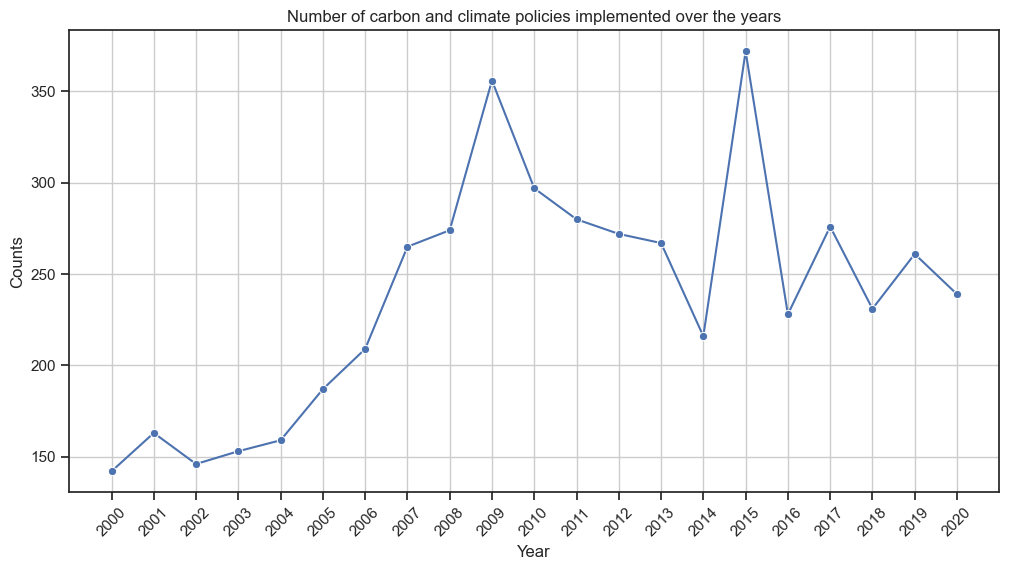

In [25]:
# Number of policies over the years
all_policy = RQ3_df.groupby(['Year'])['Policy_title'].count().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(all_policy,x='Year',y='Policy_title', marker='o')
plt.ylabel('Counts')
plt.title('Number of carbon and climate policies implemented over the years')
plt.xticks(all_policy['Year'],rotation=45)
plt.grid()
plt.show()

During 2000 to 2020, countries around the world have implemented carbon and climate policies to mitigate their impact on the world. In 2000, there were only about 130 policies, which was the lowest number of policies implemented in these 20 years, with a slight increase in 2001 and a decrease again in 2002. However, from 2002 onwards, the trend was seen to increase rapidly, with the highest spike in 2009 and 2015, both reaching over 300 policies implemented. The number was doubled from the start of the year, indicating the high severity of the situation, and after 2015, the trend shows a fluctuating pattern with a downward trend towards the end of the year. 

In [26]:
# Displaying the time trend change in policies implemented by countries throughout the years

all_policy_country = RQ3_df.groupby(['Year','Country','Country_iso'])['Policy_title'].count().reset_index()
all_policy_country = all_policy_country.rename(columns={'Policy_title':'Number of Policies'})



year_policies = px.choropleth(all_policy_country, locations='Country_iso', color = 'Number of Policies',hover_name='Country',
                    projection='natural earth', animation_frame='Year', title='Number of Policies by Country throughout the years 2000 to 2020',color_continuous_scale=px.colors.sequential.Cividis)
year_policies.show()

In [27]:
# Displaying the time trend change in overall policies implemented by countries 

policy_country = RQ3_df.groupby(['Country','Country_iso'])['Policy_title'].count().reset_index()
policy_country = policy_country.rename(columns={'Policy_title':'Number of policies'})

country_policies = px.choropleth(policy_country, locations='Country_iso', color = 'Number of policies',hover_name='Country',
                    projection='natural earth', title='Number of Policies by Country',color_continuous_scale=px.colors.sequential.Viridis)
country_policies.show()

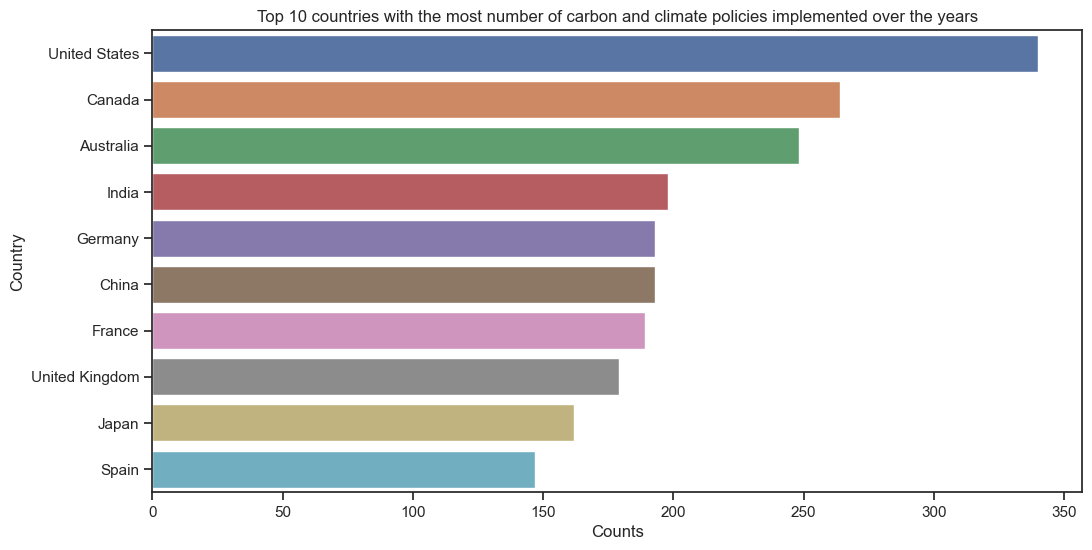

In [28]:
# display the top 10 countries with the most policies
Highest_10_country_policies = policy_country.sort_values(by=['Number of policies'],ascending=False).iloc[:10]

plt.figure(figsize=(12,6))
sns.barplot(Highest_10_country_policies,x='Number of policies',y='Country')
plt.xlabel('Counts')
plt.title('Top 10 countries with the most number of carbon and climate policies implemented over the years')
plt.show()

As we examine the trends of the policies over the years, it becomes essential to identify which countries contributed the most to policy implementations. The choropleth map shows a heatmap based on the policy distribution globally, where the higher numbers of policies are represented by dark colours, whereas the light colours represent a lower number of policies. This revealed the top 10 countries with the most policies implemented, showing the United States (US) leads with over 300 policies, with Canada and Australia following closely with about 270 and 250, respectively. These 3 countries show a big commitment to mitigating the carbon emission impact on climate change, whereas the other 7 countries have a similar number of policies, demonstrating that these countries are improving and catching up to these 3 countries.

## Policy Distribution by sectors

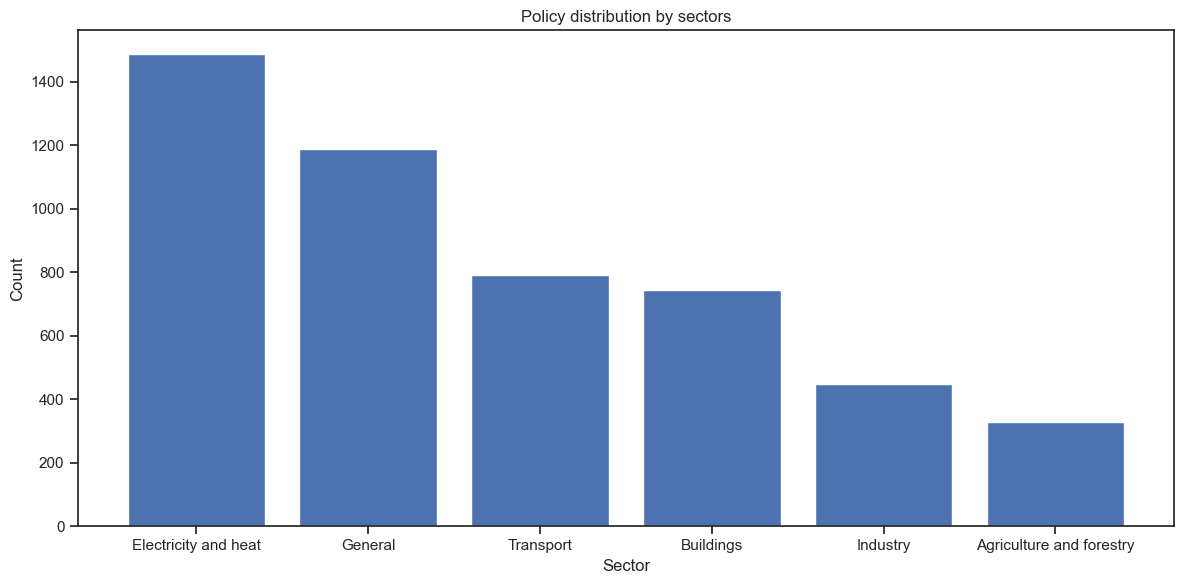

In [29]:
# Distribution of policies by sectors
sectors = []
for temp_sector in RQ3_df['Sector']:
    temp_sector = temp_sector.split(',')
    temp_sector = temp_sector[0].strip()
    sectors.append(temp_sector.strip())
        
sector = dict(Counter(sectors))
sector = dict(sorted(sector.items(),key=lambda key: key[1],reverse=True))
sector_x = sector.keys()
sector_y = sector.values()

plt.figure(figsize=(12,6))
plt.title('Policy distribution by sectors')
plt.bar(sector_x,sector_y)
plt.xlabel('Sector')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

As for the policy distribution by sector, the Electricity and heat sector leads with a significant number of over 1400 policies. This indicates that energy consumption plays a very big role in contributing to carbon emissions, affecting climate change, with countries around the world aiming to mitigate this impact. Following this, Transport and Buildings are also similar in range to each other, with a number of policies reaching 800. Moreover, the Industry sector had a moderate amount of policies aimed at this objective, with approximately 500 policies. Finally, the agriculture sector had only about 380 policies, which is the lowest among the sectors, revealing that not many countries are focusing on this sector.

## Policy objective distribution

In [30]:
# Get the number of policiy objectives based from the dataframe
first_occurrences_df = RQ3_df.drop_duplicates(subset='Country', keep='first').reset_index().iloc[:,1:]

policy_objective = {}


for index, objective in enumerate(first_occurrences_df['Policy_objective']):
    temp_objective = objective.split(',')
    first_word = temp_objective[0].strip() 
    
    if first_word in ['Economic development', 'Energy security']:
        first_word = 'Sustainability and Development'
    
    if first_word in policy_objective:
        policy_objective[first_word] += 1
    else:
        policy_objective[first_word] = 1
    first_occurrences_df['Policy_objective'][index] = first_word        
    

C:\Users\user\AppData\Local\Temp\ipykernel_18940\1828785265.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



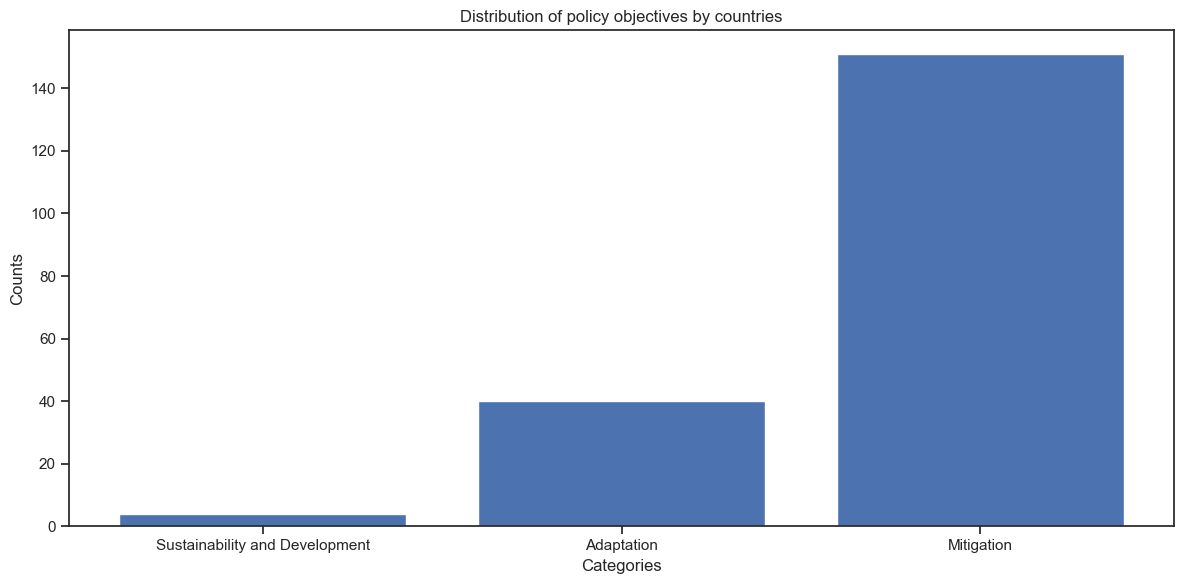

In [31]:
# plot the number of policiy objectives
policy_objective_sorted = dict(sorted(policy_objective.items(), key=lambda item: item[1]))
plt.figure(figsize=(12,6))    

plt.bar(policy_objective_sorted.keys(), policy_objective_sorted.values())
plt.title('Distribution of policy objectives by countries')
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.tight_layout()
plt.show()

For the similarity of the policies, they were divided based on 3 objectives — Mitigation, Adaptation, and Sustainable Development. The analysis shows that most countries adopted the Mitigation objective, with over 140 countries indicating that the majority of the countries have a similar mindset to undertake the mitigation action. Next, Adaptation had approximately 40 countries implementing this objective, demonstrating that a moderate proportion of countries benefit from the opportunities associated with climate change by changing the policy structure and process to minimize climate impacts. However, only a small portion of countries adopt the Sustainable Development, indicating this objective may not be too suitable in an attempt to mitigate the carbon emission impact on climate change.

## Similar Policy analysis

In [32]:
# Get the carbon and climate df and map the policies after merging
carbon_df = pd.read_csv("C:\\Users\\user\\Downloads\\FYP_2025\\RQ_4.csv")
climate_df = pd.read_csv('C:\\Users\\user\\Downloads\\FYP_2025\\Climate_dataset.csv')
climate_df = climate_df[['Country','Year','Avg annual temperature (Celcius)','Avg annual precipitation (mm)','Total Disaster recorded']]
carbon_df = carbon_df.iloc[:,:3]
merge_df = pd.merge(carbon_df, climate_df, on = ['Country','Year'], how = 'inner')

mapping_objective = {}

for country, objective_type in zip(first_occurrences_df['Country'],first_occurrences_df['Policy_objective']):
    mapping_objective[country] = objective_type
    
merge_df['Policy_objective'] = merge_df['Country'].map(mapping_objective)
merge_df =  merge_df.rename(columns={"CO2_Emissions":"Total_CO2_emission","Avg annual temperature (Celcius)":'Temperature',"Avg annual precipitation (mm)":'Precipitation','Total Disaster recorded':'Climated-related disasters'})
merge_df['Climated-related disasters'] = merge_df['Climated-related disasters'].astype(int)

merge_df

,Country,Year,Total_CO2_emission,Temperature,Precipitation,Climated-related disasters,Policy_objective
0,Afghanistan,2000,1047127.94,12.6,220.0,1,Sustainability and Development
1,Afghanistan,2001,1069098.00,13.4,203.2,0,Sustainability and Development
2,Afghanistan,2002,1340995.00,13.1,304.8,2,Sustainability and Development
3,Afghanistan,2003,1559602.00,12.5,350.3,0,Sustainability and Development
4,Afghanistan,2004,1237247.00,13.2,315.4,0,Sustainability and Development
...,...,...,...,...,...,...,...
3240,Zimbabwe,2016,10581085.00,22.3,713.6,0,Mitigation
3241,Zimbabwe,2017,9826723.00,21.2,975.7,2,Mitigation
3242,Zimbabwe,2018,11205393.00,21.9,692.7,0,Mitigation
3243,Zimbabwe,2019,10262950.00,22.4,608.3,1,Mitigation


In [33]:
# retrieve and rescale data
average_values_by_policy = merge_df.groupby(['Year','Policy_objective'])[['Total_CO2_emission','Temperature','Precipitation','Climated-related disasters']].mean().reset_index()
average_values_by_policy['Total_CO2_emission'] = average_values_by_policy['Total_CO2_emission'] / 100000
average_values_by_policy

,Year,Policy_objective,Total_CO2_emission,Temperature,Precipitation,Climated-related disasters
0,2000,Adaptation,60.774708,20.625000,1228.953571,0.392857
1,2000,Mitigation,1792.595081,18.102564,1160.599145,1.042735
2,2000,Sustainability and Development,833.711310,16.000000,541.225000,0.750000
3,2001,Adaptation,58.725586,20.857143,1199.250000,0.357143
4,2001,Mitigation,1803.665014,18.123932,1118.532479,0.777778
...,...,...,...,...,...,...
58,2019,Mitigation,2527.076408,18.866667,1139.164167,1.433333
59,2019,Sustainability and Development,1727.675542,16.600000,745.575000,1.750000
60,2020,Adaptation,111.154864,20.969231,1422.307692,0.807692
61,2020,Mitigation,2408.808271,18.876667,1181.699167,1.450000


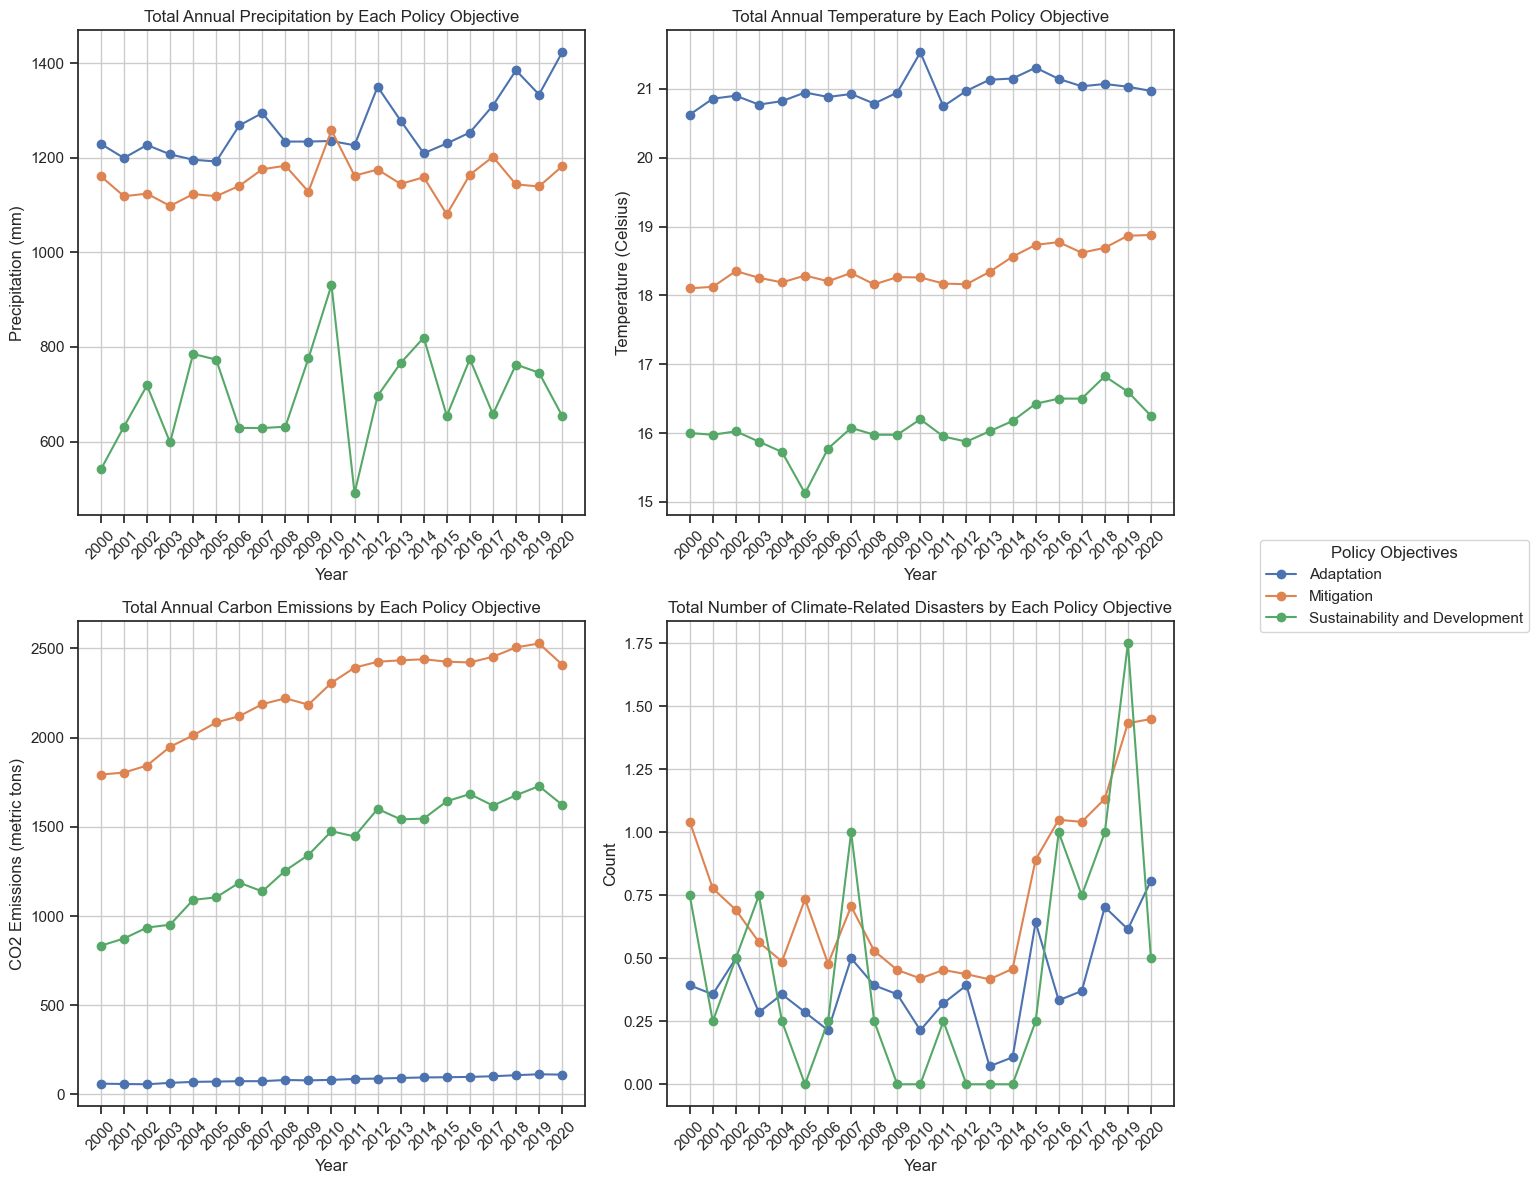

,Policy Objective,Percentage Change (Precipitation),Percentage Change (Temperature),Percentage Change (CO2 Emissions),Percentage Change (Disasters)
0,Adaptation,15.7,1.7,82.9,105.6
1,Mitigation,1.8,4.3,34.4,39.1
2,Sustainability and Development,20.9,1.6,94.7,-33.3


In [43]:
# the y-label (year values) for the plotting 
y = [i for i in range(2000,2021)]

# Prepare DataFrames for percentage changes
percentage_changes = []

# Create a single figure with 2x2 subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

# Initialize lists for handles and labels
handles = []
labels = []
added_labels = set()  # To track added labels

# Plot precipitation
precipitation_x = []
for objective in average_values_by_policy['Policy_objective'].unique():
    precipitation_x.append(list(average_values_by_policy[average_values_by_policy['Policy_objective'] == objective]['Precipitation']))
    
for data_index in range(len(precipitation_x)):
    line, = axs[0, 0].plot(y, precipitation_x[data_index], marker='o', label=average_values_by_policy['Policy_objective'].unique()[data_index])
    pct_change = ((precipitation_x[data_index][20] - precipitation_x[data_index][0]) / precipitation_x[data_index][0]) * 100
    percentage_changes.append({'Policy Objective': average_values_by_policy['Policy_objective'].unique()[data_index],
                                'Percentage Change (Precipitation)': round(pct_change, 1)})
    # Add to legend if not already added
    if average_values_by_policy['Policy_objective'].unique()[data_index] not in added_labels:
        handles.append(line)
        labels.append(average_values_by_policy['Policy_objective'].unique()[data_index])
        added_labels.add(average_values_by_policy['Policy_objective'].unique()[data_index])

axs[0, 0].grid()
axs[0, 0].set_title('Total Annual Precipitation by Each Policy Objective')
axs[0, 0].set_xlabel('Year')
axs[0, 0].set_ylabel('Precipitation (mm)')
axs[0, 0].tick_params(axis='x', rotation=45)
axs[0, 0].set_xticks(y)


# Plot temperature
temperature_x = []
for objective in average_values_by_policy['Policy_objective'].unique():
    temperature_x.append(list(average_values_by_policy[average_values_by_policy['Policy_objective'] == objective]['Temperature']))

for data_index in range(len(temperature_x)):
    line, = axs[0, 1].plot(y, temperature_x[data_index], marker='o', label=average_values_by_policy['Policy_objective'].unique()[data_index])
    pct_change = ((temperature_x[data_index][20] - temperature_x[data_index][0]) / temperature_x[data_index][0]) * 100
    percentage_changes[data_index]['Percentage Change (Temperature)'] = round(pct_change, 1)
    # Add to legend if not already added
    if average_values_by_policy['Policy_objective'].unique()[data_index] not in added_labels:
        handles.append(line)
        labels.append(average_values_by_policy['Policy_objective'].unique()[data_index])
        added_labels.add(average_values_by_policy['Policy_objective'].unique()[data_index])

axs[0, 1].grid()
axs[0, 1].set_title('Total Annual Temperature by Each Policy Objective')
axs[0, 1].set_xlabel('Year')
axs[0, 1].set_ylabel('Temperature (Celsius)')
axs[0, 1].tick_params(axis='x', rotation=45)
axs[0, 1].set_xticks(y)


# Plot carbon emissions
carbon_x = []
for objective in average_values_by_policy['Policy_objective'].unique():
    carbon_x.append(list(average_values_by_policy[average_values_by_policy['Policy_objective'] == objective]['Total_CO2_emission']))

for data_index in range(len(carbon_x)):
    line, = axs[1, 0].plot(y, carbon_x[data_index], marker='o', label=average_values_by_policy['Policy_objective'].unique()[data_index])
    pct_change = ((carbon_x[data_index][20] - carbon_x[data_index][0]) / carbon_x[data_index][0]) * 100
    percentage_changes[data_index]['Percentage Change (CO2 Emissions)'] = round(pct_change, 1)
    # Add to legend if not already added
    if average_values_by_policy['Policy_objective'].unique()[data_index] not in added_labels:
        handles.append(line)
        labels.append(average_values_by_policy['Policy_objective'].unique()[data_index])
        added_labels.add(average_values_by_policy['Policy_objective'].unique()[data_index])

axs[1, 0].grid()
axs[1, 0].set_title('Total Annual Carbon Emissions by Each Policy Objective')
axs[1, 0].set_xlabel('Year')
axs[1, 0].set_ylabel('CO2 Emissions (metric tons)')
axs[1, 0].tick_params(axis='x', rotation=45)
axs[1, 0].set_xticks(y)


# Plot climate-related disasters
disaster_x = []
for objective in average_values_by_policy['Policy_objective'].unique():
    disaster_x.append(list(average_values_by_policy[average_values_by_policy['Policy_objective'] == objective]['Climated-related disasters']))

for data_index in range(len(disaster_x)):
    line, = axs[1, 1].plot(y, disaster_x[data_index], marker='o', label=average_values_by_policy['Policy_objective'].unique()[data_index])
    pct_change = ((disaster_x[data_index][20] - disaster_x[data_index][0]) / disaster_x[data_index][0]) * 100
    percentage_changes[data_index]['Percentage Change (Disasters)'] = round(pct_change, 1)
    # Add to legend if not already added
    if average_values_by_policy['Policy_objective'].unique()[data_index] not in added_labels:
        handles.append(line)
        labels.append(average_values_by_policy['Policy_objective'].unique()[data_index])
        added_labels.add(average_values_by_policy['Policy_objective'].unique()[data_index])

axs[1, 1].grid()
axs[1, 1].set_title('Total Number of Climate-Related Disasters by Each Policy Objective')
axs[1, 1].set_xlabel('Year')
axs[1, 1].set_ylabel('Count')
axs[1, 1].tick_params(axis='x', rotation=45)
axs[1, 1].set_xticks(y)

# Create a single legend for all subplots
fig.legend(handles, labels, title='Policy Objectives', bbox_to_anchor=(1.05, 0.55), loc='upper left')

# Create DataFrame for percentage changes
percentage_change_df = pd.DataFrame(percentage_changes)

# Show the plots
plt.tight_layout()
plt.show()

# Display the percentage change DataFrame
percentage_change_df

From the line graphs based on the 3 objectives and the carbon emissions and climate aspects (Temperature, Precipitation, Climate-related disaster), the Mitigation and Sustainable Development objectives had similar changes in terms of having the lowest change in the 4 change aspects. Mitigation had the lowest change in Carbon Change and Precipitation Change with 34.4 metric tonnes and 1.8 mm, respectively. Whereas Sustainability and Development had the lowest change in Temperature Change and Disaster Change, with 1.6 Celsius and -33.3 average number of disasters, respectively. These findings show that these two policy objectives play a crucial role in improving the global conditions. Nonetheless, adaptation also played an effective role in policy measurement in helping to minimize the temperature change by 1.7 degrees Celsius, closely following sustainable development with a difference of 0.1 degrees Celsius. 


## Word cloud analysis

In [700]:
# retrieve the policy description based on the most effective impact by the carbon and climate policies
RQ3_df['Policy_objective'] = RQ3_df['Country'].map(mapping_objective)
policy_description_df = RQ3_df[(RQ3_df['Policy_objective'] == 'Mitigation') | (RQ3_df['Policy_objective'] == 'Sustainability and Development')]['Policy_description'].reset_index().iloc[:,1:]
policy_description_df = policy_description_df[policy_description_df['Policy_description'] != 'Unknown']
policy_description_df

,Policy_description
0,The Decree of 11 April 2008 lays down the crit...
1,At the heart of the monitoring process for the...
3,"As part of the ""Investment for the Future” pro..."
5,This programme aims at helping low-income indi...
6,The Energy Account was introduced in Italy wit...
...,...
4823,This strategy sets out proposals for decarboni...
4824,These action plans establish voluntary commitm...
4825,This program by the U.S. Department of Energy ...
4826,This Act aims to improve the capacity of the S...


In [701]:
# Stopword
stop_words = stopwords.words('english')
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()


In [702]:
# pre-processing words for word cloud analysis
cleaned_words = []

for sentence in policy_description_df['Policy_description']:
    sentence = re.sub(r'[^\w\s]', ' ', sentence)
    sentence = sentence.lower().split()
    sentence = list(set(sentence))
    sentence = [word for word in sentence if word.isalpha()]
    sentence = [word for word in sentence if word not in stop_words]
    for word in sentence:
      cleaned_words.append(wnl.lemmatize(word))

cloud_word = ' '.join(cleaned_words)  

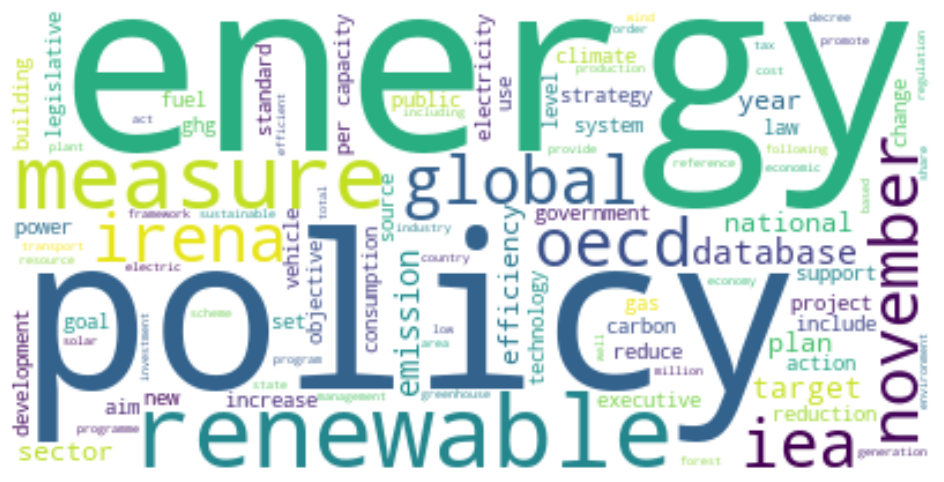

In [703]:
# plot the word cloud analysis
plt.figure(figsize=(12,6))
wc = WordCloud(background_color='white',collocations=False).generate(cloud_word)
plt.axis('off')
plt.imshow(wc,interpolation='bilinear')
plt.show()

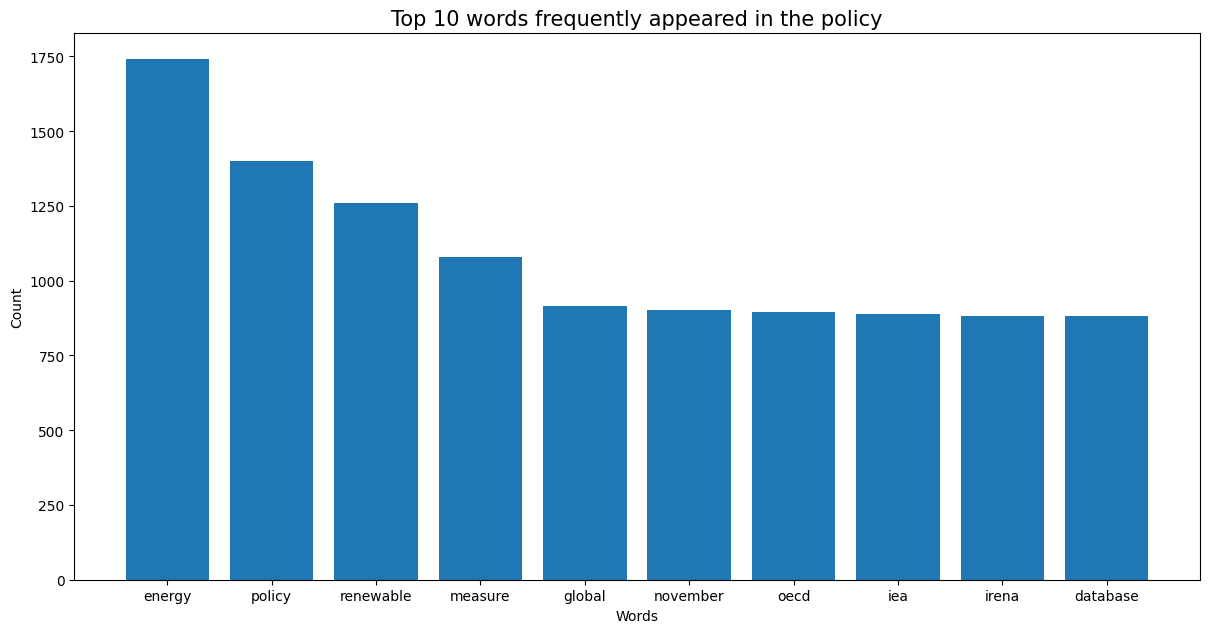

In [704]:
# Display the top 10 words appeared in the word cloud analysis
sorted_by_values = sorted(dict(Counter(cleaned_words)).items(), key=lambda item: item[1],reverse=True)[:10]

word_y = []
word_x = []

for word_pair in sorted_by_values:
    word_x.append(word_pair[0])
    word_y.append(word_pair[1])

plt.figure(figsize=(12,6))
plt.bar(word_x,word_y)
plt.tight_layout()


plt.xlabel('Words')
plt.ylabel('Count')
plt.title('Top 10 words frequently appeared in the policy',fontsize=15)
plt.show()

As the two policies ‘Mitigation’ and ‘Sustainable Development’ are the most effective, word cloud analysis was conducted on the policy descriptions, and it revealed some key words based on the top 10 frequently appearing in these policies that may have contributed to improving the environment. The frequent mention of terms like 'Renewable' and 'Energy' implies the policies focus on transitioning to clean energy sources, aligning with global goals to mitigate carbon emissions. Moreover, organizations like 'OECD': 'Organisation for Economic Co-operation and Development', 'IEA': 'International Energy Agency', and 'IRENA': 'International Renewable Energy Agency ' suggest that these policies, are collaborated with them, are more likely to achieve on improving carbon and climate goals. Addionally, meetings on discussions of the current progress the policies are to be held on the term which is most likely to happen in November, with the 'Database' being a tracking data log to ensure the consistency of the policy progress.

## Reccomendations

This research shows that there is a significant link between carbon emissions and climate change, and its drivers span energy production, transportation, industrial activity, land use, and population and economic growth. Therefore, future climate policies should focus on "sector integration" and "policy diversity" to improve the policy's targetedness and overall effectiveness.

First, governments should tailor policy tools for high-carbon emission sectors, especially in the fields of energy and heat production to accelerate the deployment of renewable energy and innovation in energy storage technology; strengthen low-carbon technology and infrastructure construction in transportation and manufacturing; introduce more carbon pricing and compensation mechanisms for agriculture and land use changes, and strengthen forest protection and restoration.

Secondly, in terms of policy design, we should go beyond the single "mitigation" orientation and combine adaptation and sustainability. For example, the climate-resilient urban infrastructure in Japan and India can serve as an international model. At the same time, policies should focus on cross-sectoral collaboration and multi-level governance, especially strengthening technical and financial cooperation between developed and developing countries, so as to narrow the policy gap and enhance the overall global response capacity.

In addition, considering the strong impact of social factors on carbon emissions, it is recommended to incorporate energy efficiency improvement, low-carbon economic development and population policies into future climate action plans, encourage green innovation and education, and strengthen the application of big data and machine learning technologies in emission forecasting and monitoring.

Based on the analysis results of this research, it can be clearly pointed out that global carbon emissions continued to rise between 2000 and 2020, mainly from sectors such as energy production, transportation, industry and land use, and were profoundly affected by economic and social development. Although international climate awareness and the number of policies have increased significantly, especially in developed countries, the overall carbon emission control effect is still not significant, indicating that there are still gaps and implementation challenges in current policies.

## Conclusion

This research revealed the high correlation between carbon emissions and climate variables (temperature, rainfall) and social variables (GDP, energy consumption, population, life expectancy) through statistical and machine learning models, providing an important empirical basis. In particular, the linkage between economic growth and energy consumption highlights the necessity and complexity of future "decarbonized growth".

In addition, the effectiveness of climate policy depends on the balance and integration between “mitigation, sustainability, and adaptation”. Only climate action with high adaptability and systematic planning can gradually achieve carbon neutrality and climate security without sacrificing economic development and social well-being.

Ultimately, to effectively respond to the challenges of climate change, we must work simultaneously on three levels: technological innovation, policy coordination, and social behavior, to build a resilient, inclusive, and forward-looking climate governance system. This is not only a revolution in energy transformation, but also a critical test for the world's sustainable future.